In [1]:
%matplotlib inline
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix

print("TF version: ", tf.__version__)
print("Keras version: ", keras.__version__)

TF version:  2.5.0
Keras version:  2.5.0


In [2]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_dev, y_dev) = mnist.load_data()

In [3]:
rescale = keras.Sequential()
rescale.add(layers.experimental.preprocessing.Rescaling(1.0/255))

In [4]:
X_train = tf.reshape(rescale(X_train), shape=(-1, 28, 28, 1))
X_dev = tf.reshape(rescale(X_dev), shape=(-1, 28, 28, 1))

In [5]:
X_train.shape, X_dev.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

In [6]:
transformations = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.01),
    layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
    layers.experimental.preprocessing.RandomZoom((-0.1, 0.1))
])
X_train_t = transformations(X_train)
X_dev_t = transformations(X_dev)

0


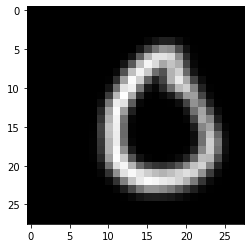

In [7]:
n = np.random.randint(X_train_t.shape[0])
print(y_train[n])
plt.imshow(X_train_t[n].numpy().squeeze(), cmap="gray");

In [8]:
model = keras.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPool2D(2, 2),

    layers.Dropout(rate=0.3),

    layers.Flatten(),

    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)              

In [9]:
hist = model.fit(X_train_t, y_train, batch_size=32, epochs=10, validation_data=(X_dev_t, y_dev)) # TODO: plot the grafic

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.3330 - accuracy: 0.8942 - val_loss: 0.0879 - val_accuracy: 0.9718
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1252 - accuracy: 0.9623 - val_loss: 0.0628 - val_accuracy: 0.9802
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0957 - accuracy: 0.9708 - val_loss: 0.0522 - val_accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0402 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0694 - accuracy: 0.9782 - val_loss: 0.0378 - val_accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - accuracy: 0.9804 - val_loss: 0.0414 - val_accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0556 - accuracy: 0.9823 - val_loss: 0.0367 - val_accuracy:

In [10]:
p_dev = np.argmax(model.predict(X_dev), axis=1)

In [11]:
f1_score(y_dev, p_dev, average='weighted')

0.9937990701693565

In [12]:
confusion_matrix(y_dev, p_dev)

array([[ 978,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    0,    1,    0,    0,    1,    4,    0,    0],
       [   1,    0, 1025,    0,    0,    0,    0,    6,    0,    0],
       [   0,    0,    0, 1009,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,  974,    0,    0,    1,    0,    7],
       [   1,    0,    0,    4,    0,  886,    1,    0,    0,    0],
       [   5,    2,    0,    0,    0,    3,  947,    0,    1,    0],
       [   0,    1,    3,    0,    1,    0,    0, 1023,    0,    0],
       [   0,    0,    0,    1,    0,    1,    0,    0,  971,    1],
       [   2,    0,    0,    1,    4,    2,    0,    1,    3,  996]])

**TODO:**   
1. anomaly detection / outlier removal
2. Retrain the net with better data
3. test the network with external data
4. if succesful save the net and load in the web app, else repeat the steps again

In [13]:
# Codes goes on